<a href="https://colab.research.google.com/github/andibuyy/andibuyy/blob/main/Supermarket_Sales_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- NAMA : ANDI SARIPATI
- NIM  : 221011400578
- PROGRAM STUDI : TEKNIK INFORMATIKA S1

# **1. Menentukan Objek Data**

Tujuan analisis ini adalah untuk memahami pola transaksi pelanggan di supermarket, mengidentifikasi performa penjualan berdasarkan kategori produk, metode pembayaran, dan cabang, serta menemukan wawasan menarik untuk manajemen

Variabel yang relevan dari dataset adalah sebagai berikut:

- Date: Tanggal transaksi.

- Payment: Metode pembayaran yang digunakan.

- Invoice ID: ID unik untuk setiap transaksi.

- Branch: Cabang supermarket tempat transaksi terjadi.

- City: Kota lokasi cabang.

- Customer type: Jenis pelanggan (Member atau Normal).

- Gender: Jenis kelamin pelanggan.

- Product line: Kategori produk yang dibeli.

- Unit price: Harga per unit produk.

- Quantity: Jumlah produk yang dibeli

# **2. Mengumpulkan Data**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sql
import tabulate as tl

In [108]:
# Buka Dataset
df_sales = pd.read_csv("/content/supermarket_sales.csv")
df_sales

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7
...,...,...,...,...,...,...,...,...,...,...
995,1/29/2019,Ewallet,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1
996,3/2/2019,Ewallet,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10
997,2/9/2019,Cash,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1
998,2/22/2019,Cash,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1


In [109]:
# Tampilkan 5 Baris Pertama
df_sales.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7


In [110]:
# Info Data
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB


# **3. Menerapkan Akses Basis Data**

In [111]:
# Tambahkan kolom baru sesuai kebutuhan analisis
# Hitung Tax (dengan asumsi tarif pajak 5% )
# Menambahkan kolom 'Rating' dengan nilai acak antara 1 dan 10

df_sales["Tax"] = df_sales["Unit price"] * df_sales["Quantity"] * 0.05
df_sales["Total"] = df_sales["Unit price"] * df_sales["Quantity"] + df_sales["Tax"]
df_sales["Rating"] = np.random.randint(1, 11, size=len(df_sales))

### 3.1 Total penjualan per cabang

In [112]:
# Total penjualan per cabang
print("\nTotal penjualan per cabang:")
sales_per_branch = df_sales.groupby('Branch')['Total'].sum().reset_index()
sales_per_branch.columns = ['Branch', 'Total Sales']
print(sales_per_branch.to_markdown(index=False))


Total penjualan per cabang:
| Branch   |   Total Sales |
|:---------|--------------:|
| A        |        106200 |
| B        |        106198 |
| C        |        110569 |


### 3.2 Jumlah transaksi per metode pembayaran

In [113]:
# Jumlah transaksi per metode pembayaran
print("\nJumlah transaksi per metode pembayaran:")
transactions_per_payment = df_sales.groupby('Payment').size().reset_index(name='Transaction Count')
print(transactions_per_payment.to_markdown(index=False))


Jumlah transaksi per metode pembayaran:
| Payment     |   Transaction Count |
|:------------|--------------------:|
| Cash        |                 344 |
| Credit card |                 311 |
| Ewallet     |                 345 |


### 3.3 Rata-rata rating per produk

In [114]:
# Rata-rata rating per produk
print("\nRata-rata rating per produk:")
avg_rating_per_product = df_sales.groupby('Product line')['Rating'].mean().reset_index()
avg_rating_per_product.columns = ['Product Line', 'Average Rating']
print(avg_rating_per_product.to_markdown(index=False))



Rata-rata rating per produk:
| Product Line           |   Average Rating |
|:-----------------------|-----------------:|
| Electronic accessories |          5.23529 |
| Fashion accessories    |          5.47191 |
| Food and beverages     |          5.51724 |
| Health and beauty      |          5.40789 |
| Home and lifestyle     |          5.48125 |
| Sports and travel      |          5.56024 |


# **4. Memvalidasi Data**

### 4.1 Periksa Nilai Kosong / Missing Value

In [115]:
# Periksa nilai kosong (missing value)
print("\nJumlah nilai kosong per kolom:")
print(df_sales.isnull().sum())


Jumlah nilai kosong per kolom:
Date             0
Payment          0
Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax              0
Total            0
Rating           0
dtype: int64


### 4.2 Periksa Duplikasi Invoice ID

In [116]:
# Periksa duplikasi Invoice ID
print("\nJumlah duplikasi Invoice ID:")
print(df_sales['Invoice ID'].duplicated().sum())


Jumlah duplikasi Invoice ID:
0


### 4.3 Validitas Rumus

In [117]:
# Validasi rumus: Total = Unit Price * Quantity + Tax
df_sales["Total"] = df_sales["Unit price"] * df_sales["Quantity"] + df_sales["Tax"]

# Membuat kolom untuk menyimpan hasil perhitungan ulang Total
df_sales['Calculated Total'] = df_sales['Unit price'] * df_sales['Quantity'] + df_sales['Tax']

# Membandingkan kolom 'Total' dengan 'Calculated Total'
# Memeriksa apakah ada perbedaan antara nilai 'Total' yang sudah ada dan yang dihitung ulang
formula_validation = (df_sales['Total'] == df_sales['Calculated Total']).all()
print(f"\nValiditas rumus : {formula_validation}")


Validitas rumus : True


### 4.4 Rentang nilai rating (1–10)

In [118]:
# Validasi Rentang Nilai Rating (1-10)
print("\nValidasi Rentang Nilai Rating (1-10):")
min_rating = df_sales['Rating'].min()
max_rating = df_sales['Rating'].max()
print(f"Nilai Rating Minimum: {min_rating}")
print(f"Nilai Rating Maksimum: {max_rating}")

if min_rating >= 1 and max_rating <= 10:
    print("Rentang nilai 'Rating' valid (1-10).")
else:
    print("Rentang nilai 'Rating' tidak valid. Di luar 1-10.")


Validasi Rentang Nilai Rating (1-10):
Nilai Rating Minimum: 1
Nilai Rating Maksimum: 10
Rentang nilai 'Rating' valid (1-10).


In [119]:
# Usulan langkah perbaikannya:
print("\nUsulan langkah perbaikan:")
if df_sales.isnull().sum().any():
    print("- Tangani nilai kosong, misalnya dengan imputasi atau penghapusan baris/kolom terkait.")
else:
    print("- Tidak ada nilai kosong yang ditemukan.")

if df_sales['Invoice ID'].duplicated().any():
    print("- Tangani duplikasi 'Invoice ID', misalnya dengan menghapus duplikat atau menyelidiki penyebabnya.")
else:
    print("- Tidak ada duplikasi 'Invoice ID' yang ditemukan.")

if not formula_validation:
    print("- Periksa kembali rumus perhitungan 'Total' karena ada ketidaksesuaian.")
else:
    print("- Rumus perhitungan 'Total' sudah valid.")

# Hapus kolom 'Calculated Total' setelah validasi jika tidak diperlukan lagi
df = df_sales.drop(columns=['Calculated Total'])


Usulan langkah perbaikan:
- Tidak ada nilai kosong yang ditemukan.
- Tidak ada duplikasi 'Invoice ID' yang ditemukan.
- Rumus perhitungan 'Total' sudah valid.


# **5. Analisa Deskriptif**

In [120]:
# Hitung rata-rata, maksimum, dan minimum untuk kolom: Total, Quantity, dan Rating
descriptive_stats = df_sales[['Total', 'Quantity', 'Rating']].agg(['mean', 'max', 'min'])
print("\nDeskriptif Statistics :")
print(descriptive_stats.to_markdown(numalign="right", stralign="left"))

# Mengelompokkan berdasarkan 'Product line' dan menghitung rata-rata 'Total'
# Tampilkan produk dengan rata-rata Total tertinggi
product_total_avg = df_sales.groupby('Product line')['Total'].mean().sort_values(ascending=False)

print("\nProduk dengan rata-rata Total tertinggi:")
print(product_total_avg.head())


Deskriptif Statistics :
|      |   Total |   Quantity |   Rating |
|:-----|--------:|-----------:|---------:|
| mean | 322.967 |       5.51 |    5.446 |
| max  | 1042.65 |         10 |       10 |
| min  | 10.6785 |          1 |        1 |

Produk dengan rata-rata Total tertinggi:
Product line
Home and lifestyle        336.636956
Sports and travel         332.065220
Health and beauty         323.643020
Food and beverages        322.671517
Electronic accessories    319.632538
Name: Total, dtype: float64


# **6. Analisa Penjualan**

### 6.1 Ringkasan Penjualan Total Berdasarkan Branch:


Total penjualan berdasarkan Cabang:
| Branch   |   Total |
|:---------|--------:|
| C        |  110569 |
| A        |  106200 |
| B        |  106198 |


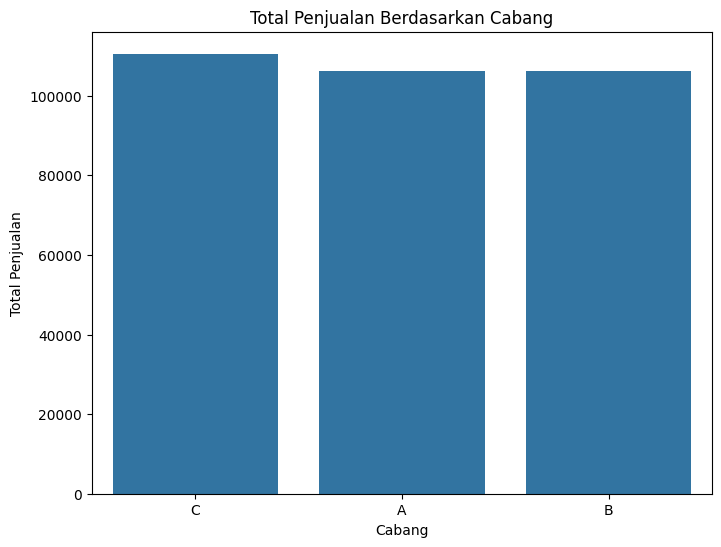

In [121]:
# Ringkasan penjualan total berdasarkan Branch
sales_by_branch = df_sales.groupby('Branch')['Total'].sum().sort_values(ascending=False)
print("\nTotal penjualan berdasarkan Cabang:")
print(sales_by_branch.to_markdown())

# Visualisasi penjualan berdasarkan Branch (Diagram Batang)
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_branch.index, y=sales_by_branch.values)
plt.title('Total Penjualan Berdasarkan Cabang')
plt.xlabel('Cabang')
plt.ylabel('Total Penjualan')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


### 6.2 Ringkasan Penjualan Total Berdasarkan Product line


Total penjualan berdasarkan Product line:
| Product line           |   Total |
|:-----------------------|--------:|
| Food and beverages     | 56144.8 |
| Sports and travel      | 55122.8 |
| Electronic accessories | 54337.5 |
| Fashion accessories    | 54305.9 |
| Home and lifestyle     | 53861.9 |
| Health and beauty      | 49193.7 |


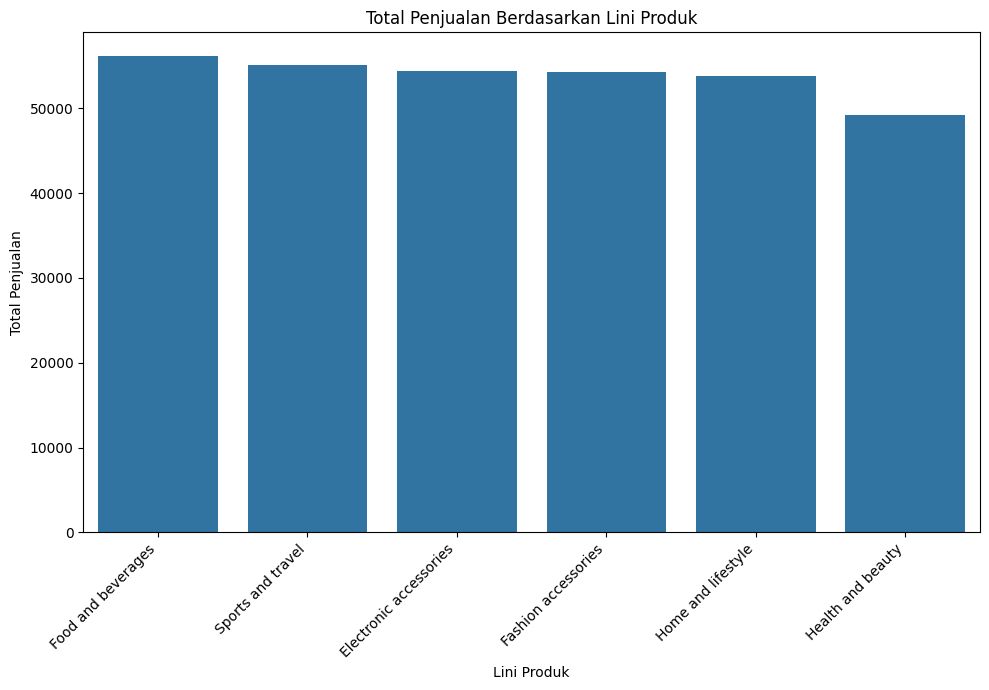

In [122]:
# Ringkasan penjualan total berdasarkan Product line
sales_by_product_line = df_sales.groupby('Product line')['Total'].sum().sort_values(ascending=False)
print("\nTotal penjualan berdasarkan Product line:")
print(sales_by_product_line.to_markdown())

# Visualisasi penjualan berdasarkan Product line (Diagram Batang)
plt.figure(figsize=(10, 7))
sns.barplot(x=sales_by_product_line.index, y=sales_by_product_line.values)
plt.title('Total Penjualan Berdasarkan Lini Produk')
plt.xlabel('Lini Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

### 6.3 Ringkasan Penjualan Total Berdasarkan Payment Metode


Total penjualan berdasarkan Metode Pembayaran:
| Payment     |   Total |
|:------------|--------:|
| Cash        |  112207 |
| Ewallet     |  109993 |
| Credit card |  100767 |


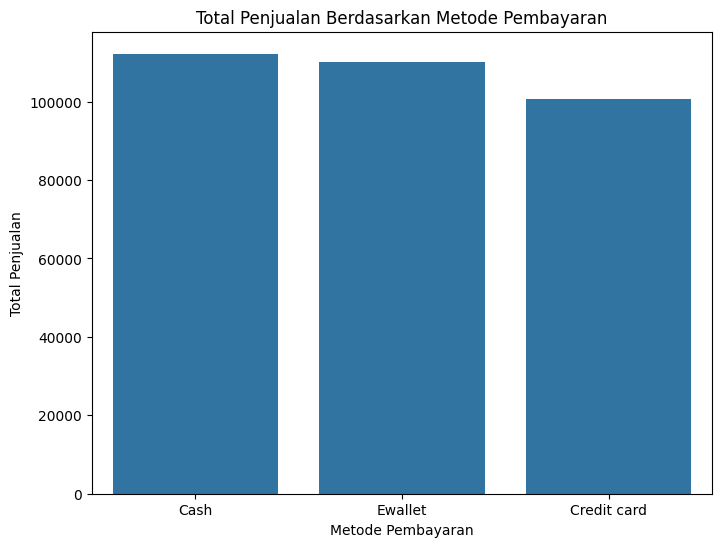

In [123]:
# Ringkasan penjualan total berdasarkan Payment method
sales_by_payment_method = df_sales.groupby('Payment')['Total'].sum().sort_values(ascending=False)
print("\nTotal penjualan berdasarkan Metode Pembayaran:")
print(sales_by_payment_method.to_markdown())

# Visualisasi penjualan berdasarkan Payment method (Diagram Batang)
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_payment_method.index, y=sales_by_payment_method.values)
plt.title('Total Penjualan Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Penjualan')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# **7. Analisis Waktu**

### 7.1 Ubah kolom Date menjadi format waktu

In [124]:
# Mengubah kolom 'Date' menjadi format datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

### 7.2 Hitung jumlah transaksi per bulan atau per hari

In [125]:
# Menghitung jumlah transaksi per bulan
df_sales['Month'] = df_sales['Date'].dt.to_period('M')
transactions_per_month = df_sales.groupby('Month').size()
print("\nJumlah transaksi per bulan:")
print(transactions_per_month)

# Menghitung jumlah transaksi per hari
transactions_per_day = df_sales.groupby(df_sales['Date'].dt.date).size()
print("\nJumlah transaksi per hari:")
print(transactions_per_day)


Jumlah transaksi per bulan:
Month
2019-01    352
2019-02    303
2019-03    345
Freq: M, dtype: int64

Jumlah transaksi per hari:
Date
2019-01-01    12
2019-01-02     8
2019-01-03     8
2019-01-04     6
2019-01-05    12
              ..
2019-03-26    13
2019-03-27    10
2019-03-28    10
2019-03-29     8
2019-03-30    11
Length: 89, dtype: int64


### 7.3 Grafik Tren Penjualan Berdasarkan Waktu

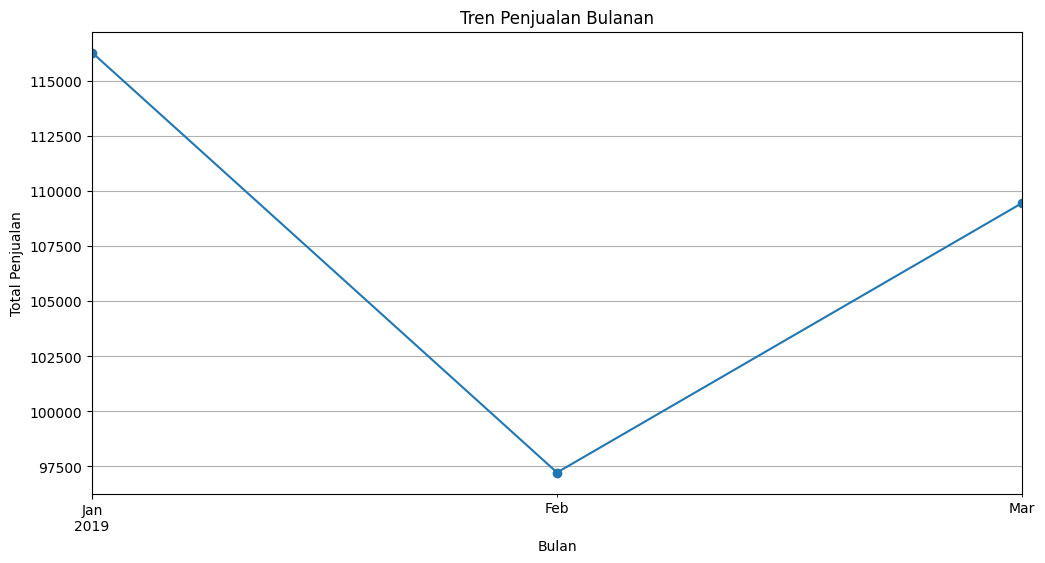

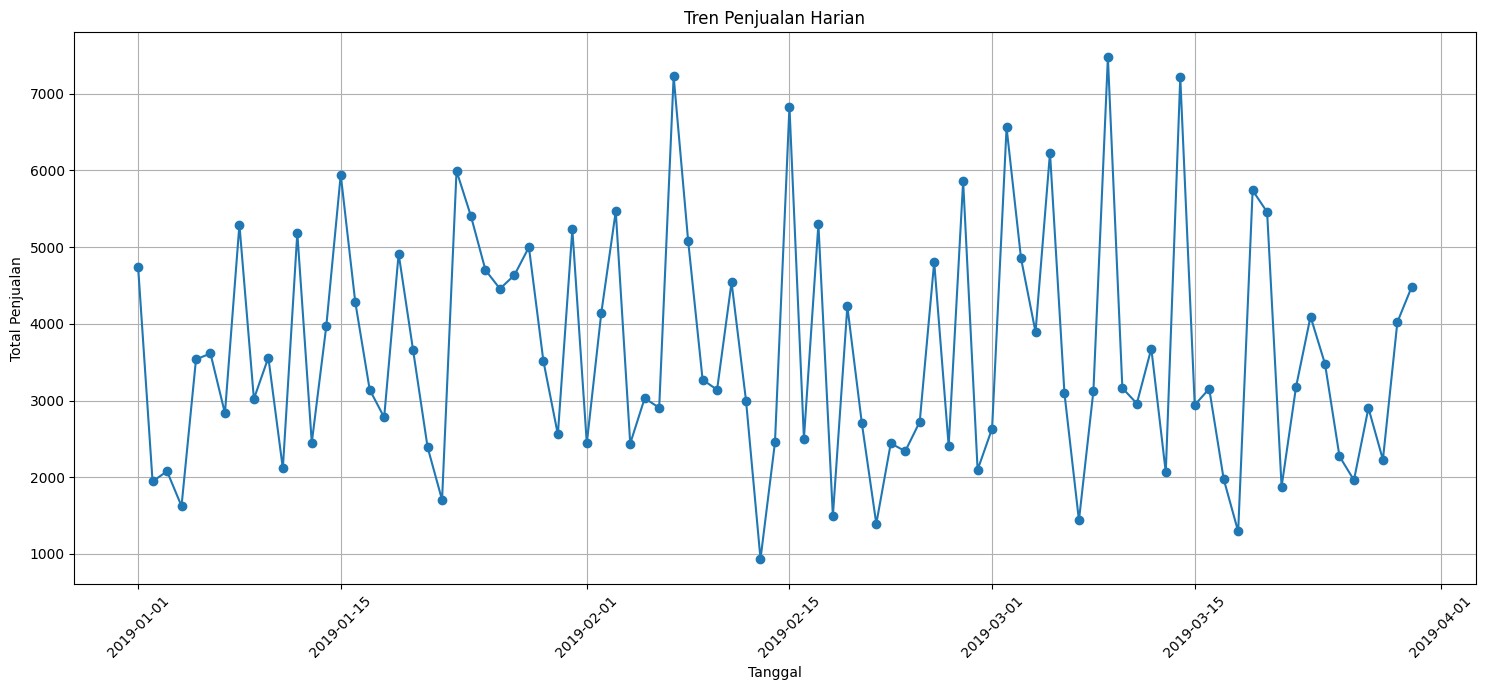

In [126]:
# Membuat grafik tren penjualan berdasarkan waktu (per bulan)
sales_per_month = df_sales.groupby('Month')['Total'].sum()
plt.figure(figsize=(12, 6))
sales_per_month.plot(kind='line', marker='o')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Membuat grafik tren penjualan berdasarkan waktu (per hari)
sales_per_day = df_sales.groupby(df_sales['Date'].dt.date)['Total'].sum()
plt.figure(figsize=(15, 7))
sales_per_day.plot(kind='line', marker='o')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **8. Analisis Pelanggan**

### 8.1 Perbandingan rata-rata Total berdasarkan jenis Customer Type dan Gender.

In [131]:
# Standardisasi kolom 'Gender'
df_sales['Gender'] = df_sales['Gender'].str.capitalize()

# Membandingkan rata-rata Total berdasarkan jenis Customer Type
avg_total_by_customer_type = df_sales.groupby('Customer type')['Total'].mean().sort_values(ascending=False)
print("\nRata-rata Total berdasarkan Tipe Pelanggan:")
print(avg_total_by_customer_type.to_markdown())

# Membandingkan rata-rata Total berdasarkan Gender
avg_total_by_gender = df_sales.groupby('Gender')['Total'].mean().sort_values(ascending=False)
print("\nRata-rata Total berdasarkan Gender:")
print(avg_total_by_gender.to_markdown())

# Membandingkan rata-rata Total berdasarkan kombinasi Customer Type dan Gender
avg_total_by_customer_type_gender = df_sales.groupby(['Customer type', 'Gender'])['Total'].mean().unstack()
print("\nRata-rata Total berdasarkan Tipe Pelanggan dan Gender:")
print(avg_total_by_customer_type_gender.to_markdown())


Rata-rata Total berdasarkan Tipe Pelanggan:
| Customer type   |   Total |
|:----------------|--------:|
| Member          | 327.791 |
| Normal          | 318.123 |

Rata-rata Total berdasarkan Gender:
| Gender   |   Total |
|:---------|--------:|
| Female   | 335.273 |
| Male     | 310.789 |
| Fml      | 246.488 |

Rata-rata Total berdasarkan Tipe Pelanggan dan Gender:
| Customer type   |   Female |     Fml |    Male |
|:----------------|---------:|--------:|--------:|
| Member          |  337.728 | nan     | 316.985 |
| Normal          |  332.592 | 246.488 | 305.048 |


In [139]:
# Tampilkan semua nilai unik di kolom 'Gender'
unique_genders = df_sales['Gender'].unique()
print("Nilai unik di kolom 'Gender':")
print(unique_genders)

# Hitung berapa banyak baris yang memiliki nilai 'Fml'
fml_count = (df_sales['Gender'] == 'Fml').sum()
print(f"Jumlah baris dengan nilai 'Fml' di kolom 'Gender': {fml_count}")

# Bersihkan data gender
df_sales['Gender'] = df_sales['Gender'].replace('Fml', 'Female')

# Tampilkan semua nilai unik di kolom 'Gender' setelah pembersihan
unique_genders_after_cleaning = df_sales['Gender'].unique()
print("Nilai unik di kolom 'Gender' setelah pembersihan:")
print(unique_genders_after_cleaning)


Nilai unik di kolom 'Gender':
['Female' 'Male']
Jumlah baris dengan nilai 'Fml' di kolom 'Gender': 0
Nilai unik di kolom 'Gender' setelah pembersihan:
['Female' 'Male']


In [140]:


# Membandingkan rata-rata Total berdasarkan jenis Customer Type
avg_total_by_customer_type = df_sales.groupby('Customer type')['Total'].mean().sort_values(ascending=False)
print("\nRata-rata Total berdasarkan Tipe Pelanggan:")
print(avg_total_by_customer_type.to_markdown())

# Membandingkan rata-rata Total berdasarkan Gender
avg_total_by_gender = df_sales.groupby('Gender')['Total'].mean().sort_values(ascending=False)
print("\nRata-rata Total berdasarkan Gender:")
print(avg_total_by_gender.to_markdown())

# Membandingkan rata-rata Total berdasarkan kombinasi Customer Type dan Gender
avg_total_by_customer_type_gender = df_sales.groupby(['Customer type', 'Gender'])['Total'].mean().unstack()
print("\nRata-rata Total berdasarkan Tipe Pelanggan dan Gender:")
print(avg_total_by_customer_type_gender.to_markdown())


Rata-rata Total berdasarkan Tipe Pelanggan:
| Customer type   |   Total |
|:----------------|--------:|
| Member          | 327.791 |
| Normal          | 318.123 |

Rata-rata Total berdasarkan Gender:
| Gender   |   Total |
|:---------|--------:|
| Female   | 335.096 |
| Male     | 310.789 |

Rata-rata Total berdasarkan Tipe Pelanggan dan Gender:
| Customer type   |   Female |    Male |
|:----------------|---------:|--------:|
| Member          |  337.728 | 316.985 |
| Normal          |  332.233 | 305.048 |


### 8.2 perbedaan yang mencolok

In [141]:
# Analisis perbedaan yang mencolok setelah standardisasi
print("\nAnalisis perbedaan yang mencolok:")
if avg_total_by_customer_type['Member'] > avg_total_by_customer_type['Normal']:
    print("- Rata-rata pengeluaran pelanggan 'Member' lebih tinggi daripada 'Normal'.")
else:
    print("- Rata-rata pengeluaran pelanggan 'Normal' lebih tinggi daripada 'Member'.")

if avg_total_by_gender['Female'] > avg_total_by_gender['Male']:
    print("- Rata-rata pengeluaran pelanggan 'Female' lebih tinggi daripada 'Male'.")
else:
    print("- Rata-rata pengeluaran pelanggan 'Male' lebih tinggi daripada 'Female'.")


Analisis perbedaan yang mencolok:
- Rata-rata pengeluaran pelanggan 'Member' lebih tinggi daripada 'Normal'.
- Rata-rata pengeluaran pelanggan 'Female' lebih tinggi daripada 'Male'.


# **9. Pola Menarik / Insight**

In [143]:
# Insight 1: Produk paling laku di cabang tertentu (misalnya, cabang dengan penjualan tertinggi dan produk teratasnya)
# Cabang C memiliki penjualan tertinggi. Mari kita lihat produk terlaris di cabang C.
branch_c_sales = df_sales[df_sales['Branch'] == 'C'].groupby('Product line')['Total'].sum().sort_values(ascending=False)
insight1_product = branch_c_sales.index[0]
insight1_value = branch_c_sales.values[0]
print(f"\nInsight 1: Produk yang paling laku di cabang 'C' (cabang dengan penjualan total tertinggi) adalah '{insight1_product}' dengan total penjualan sebesar ${insight1_value:,.2f}.")

# Insight 2: Pola pembayaran (metode pembayaran paling populer)
most_popular_payment = sales_by_payment_method.index[0]
print(f"\nInsight 2: Metode pembayaran paling populer adalah '{most_popular_payment}', menunjukkan preferensi pelanggan terhadap metode ini.")

# Insight 3: Perbedaan pengeluaran antar gender atau tipe pelanggan (dari analisis pelanggan)
if avg_total_by_gender['Female'] > avg_total_by_gender['Male']:
    insight3_gender = "Perempuan"
    insight3_gender_value = avg_total_by_gender['Female']
else:
    insight3_gender = "Laki-laki"
    insight3_gender_value = avg_total_by_gender['Male']

if avg_total_by_customer_type['Member'] > avg_total_by_customer_type['Normal']:
    insight3_customer_type = "Anggota"
    insight3_customer_type_value = avg_total_by_customer_type['Member']
else:
    insight3_customer_type = "Normal"
    insight3_customer_type_value = avg_total_by_customer_type['Normal']

print(f"\nInsight 3: Terdapat perbedaan pengeluaran rata-rata yang signifikan antara jenis kelamin dan tipe pelanggan.\n"
      f"Pelanggan {insight3_gender} memiliki rata-rata pengeluaran lebih tinggi (${insight3_gender_value:,.2f}) dibandingkan yang lain.\n"
      f"Demikian pula, pelanggan tipe '{insight3_customer_type}' memiliki rata-rata pengeluaran yang lebih tinggi (${insight3_customer_type_value:,.2f}) dibandingkan tipe lainnya.")


Insight 1: Produk yang paling laku di cabang 'C' (cabang dengan penjualan total tertinggi) adalah 'Food and beverages' dengan total penjualan sebesar $23,766.85.

Insight 2: Metode pembayaran paling populer adalah 'Cash', menunjukkan preferensi pelanggan terhadap metode ini.

Insight 3: Terdapat perbedaan pengeluaran rata-rata yang signifikan antara jenis kelamin dan tipe pelanggan.
Pelanggan Perempuan memiliki rata-rata pengeluaran lebih tinggi ($335.10) dibandingkan yang lain.
Demikian pula, pelanggan tipe 'Anggota' memiliki rata-rata pengeluaran yang lebih tinggi ($327.79) dibandingkan tipe lainnya.
